# 重力と測地線 (2)

## Geodesic

* [Geodesic - Wikipedia](https://en.wikipedia.org/wiki/Geodesic)

* [Physics - Pushing the envelope of general relativity](https://physics.aps.org/articles/v2/71)

![fig-34](https://physics.aps.org/assets/f842dc5c-a38c-4a5b-b1f5-d042e072079a/e71_1.png)

* [大圏コース - Wikipedia](https://ja.wikipedia.org/wiki/%E5%A4%A7%E5%9C%8F%E3%82%B3%E3%83%BC%E3%82%B9)

![fig-40](https://upload.wikimedia.org/wikipedia/commons/7/79/Greatcircle_Jetstream_routes.svg)

## Geodesic equation

* [Euler–Lagrange equation - Wikipedia](https://en.wikipedia.org/wiki/Euler%E2%80%93Lagrange_equation)

$$
\frac{d^2 x^\lambda}{dt^2} 
  + \Gamma^\lambda_{\mu \nu} 
    \frac{dx^\mu}{dt} \frac{dx^\nu}{dt} = 0
$$

半径 $r$ の球面を極座標 $(\theta, \phi)$ で表す:

In [34]:
R3_s.base_scalars()

[r, theta, phi]

In [35]:
s = R3_s.transform(R3_r, R3_s.base_scalars())
s

Matrix([
[sin(theta)*cos(phi)*r],
[sin(theta)*sin(phi)*r],
[         cos(theta)*r]])

$\theta$ と $\phi$ を媒介変数 $t$ の関数とみなす:

In [36]:
t = Symbol('t')

In [37]:
theta = Function('theta')(t)

In [38]:
phi = Function('phi')(t)

In [39]:
funcs = (theta, phi)

In [40]:
for i in range(2):
    display(funcs[i])

theta(t)

phi(t)

In [41]:
for i in range(2):
    display(funcs[i].diff())

Derivative(theta(t), t)

Derivative(phi(t), t)

In [42]:
for i in range(2):
    display(funcs[i].diff().diff())

Derivative(theta(t), (t, 2))

Derivative(phi(t), (t, 2))

測地線の公式に代入する:

$$
\frac{d^2 x^\lambda}{dt^2} 
  + \Gamma^\lambda_{\mu \nu} 
    \frac{dx^\mu}{dt} \frac{dx^\nu}{dt} = 0
$$

In [43]:
chr2.tensor()

[[[0, 0], [0, -sin(theta)*cos(theta)]], [[0, cos(theta)/sin(theta)], [cos(theta)/sin(theta), 0]]]

In [44]:
import itertools

In [45]:
geodesic=[0,0]
for i in range(2):
    geodesic[i] = funcs[i].diff().diff()
    for j,k in itertools.product((0,1), repeat=2):
        geodesic[i] += (chr2[i,j,k] * funcs[j].diff() * funcs[k].diff())
    display(geodesic[i])

-sin(theta)*cos(theta)*Derivative(phi(t), t)**2 + Derivative(theta(t), (t, 2))

Derivative(phi(t), (t, 2)) + 2*cos(theta)*Derivative(phi(t), t)*Derivative(theta(t), t)/sin(theta)

$$
\begin{align}
  \theta'' - \sin(\theta) \cos(\theta) (\phi')^2 & = 0 \\
  \phi'' + 2 \cot(\theta) \phi' \theta' & = 0
\end{align}
$$

測地線は一次元なので、$\theta$ を $\phi = \phi(t)$ の関数とみなし、媒介変数 $t$ で微分する。

In [46]:
theta = Function('theta')(phi)
theta

theta(phi(t))

In [47]:
display(theta, phi)

theta(phi(t))

phi(t)

In [48]:
phi.diff()

Derivative(phi(t), t)

In [49]:
theta.diff(t)

Derivative(phi(t), t)*Derivative(theta(phi(t)), phi(t))

In [50]:
theta.diff().diff()

Derivative(phi(t), t)**2*Derivative(theta(phi(t)), (phi(t), 2)) + Derivative(phi(t), (t, 2))*Derivative(theta(phi(t)), phi(t))

In [51]:
geodesic=[0,0]
funcs = (theta, phi)
for i in range(2):
    geodesic[i] = funcs[i].diff().diff()
    for j,k in itertools.product((0,1), repeat=2):
        geodesic[i] += (chr2[i,j,k] * funcs[j].diff() * funcs[k].diff())
    display(geodesic[i])

-sin(theta)*cos(theta)*Derivative(phi(t), t)**2 + Derivative(phi(t), t)**2*Derivative(theta(phi(t)), (phi(t), 2)) + Derivative(phi(t), (t, 2))*Derivative(theta(phi(t)), phi(t))

Derivative(phi(t), (t, 2)) + 2*cos(theta)*Derivative(phi(t), t)**2*Derivative(theta(phi(t)), phi(t))/sin(theta)

次のように簡略化する:

In [52]:
phi.diff().diff()

Derivative(phi(t), (t, 2))

二つ目の式 `geodesic[1]` を $\phi''$ (`phi.diff().diff()`) について解く:

In [53]:
from sympy.solvers import solve
g1, = solve(geodesic[1], phi.diff().diff())
display(g1)

-2*Derivative(phi(t), t)**2*Derivative(theta(phi(t)), phi(t))/tan(theta)

一つ目の式 `geodesic[0]` に代入する:

In [54]:
sympy.simplify(geodesic[0].subs(phi.diff().diff(), g1))

(-sin(2*theta)/2 + Derivative(theta(phi(t)), (phi(t), 2)) - 2*Derivative(theta(phi(t)), phi(t))**2/tan(theta))*Derivative(phi(t), t)**2

次の簡略化された測地線の方程式が得られる:

$$
\theta'' - 2 \cot(\theta) (\theta')^2 - \cos(\theta)\sin(\theta) = 0
$$

さらに、$\omega$ を次のように定義する:

$$
\omega(t) = \cot(\theta(t))
$$

In [55]:
theta = Function('theta')(t)

In [56]:
display(theta.diff(), theta.diff().diff())

Derivative(theta(t), t)

Derivative(theta(t), (t, 2))

In [57]:
cot(theta)

cot(theta(t))

In [58]:
sympy.simplify(cot(theta).diff())

-Derivative(theta(t), t)/sin(theta(t))**2

In [59]:
sympy.simplify(cot(theta).diff().diff())

(2*cot(theta(t))*Derivative(theta(t), t)**2 - Derivative(theta(t), (t, 2)))/sin(theta(t))**2

In [60]:
omega = Function('omega')(t)
omega

omega(t)

In [61]:
display(omega.diff(), omega.diff().diff())

Derivative(omega(t), t)

Derivative(omega(t), (t, 2))

$\omega$ に式を代入してしまうと、$\omega$ 自身やその微分について、評価を保留して記号として参照できないため、次のように間接的な手法で値を求めていく:

定義式の左辺 $\cot(\theta(t))$ を微分すると $\omega'$ : `omega.diff()` が得られる:

In [62]:
sympy.simplify(cot(theta).diff())

-Derivative(theta(t), t)/sin(theta(t))**2

上式を `solve()`を使って $\theta'$ : `theta.diff()` について解き、$\omega'$ で表す:

In [63]:
theta1, = solve(omega.diff() - sympy.simplify(cot(theta).diff()), theta.diff())
display(theta1)

-sin(theta(t))**2*Derivative(omega(t), t)

$\theta' = - \omega' \sin^2(\theta)$ が得られる。

同じように $\cot(\theta(t))$ を二回微分すると $\omega''$ : `omega.diff().diff()` が得られる:

In [64]:
sympy.simplify(cot(theta).diff().diff())

(2*cot(theta(t))*Derivative(theta(t), t)**2 - Derivative(theta(t), (t, 2)))/sin(theta(t))**2

上式を $\theta''$ : `theta.diff().diff()` について解き、$\omega''$, $\omega'$ で表す:

In [65]:
theta.diff().diff()

Derivative(theta(t), (t, 2))

In [66]:
theta2, = solve(omega.diff().diff() - sympy.simplify(cot(theta).diff()).diff(), theta.diff().diff())
display(theta2)

-sin(theta(t))**2*Derivative(omega(t), (t, 2)) + 2*Derivative(theta(t), t)**2/tan(theta(t))

In [67]:
theta2 = sympy.simplify(theta2.subs(theta.diff(), theta1))
theta2

(2*sin(theta(t))*cos(theta(t))*Derivative(omega(t), t)**2 - Derivative(omega(t), (t, 2)))*sin(theta(t))**2

上で得られた $\theta''$ : `theta2`, $\theta'$ : `theta1` を測地線の方程式に代入する:

$$
\theta'' - 2 \cot(\theta) (\theta')^2 - \cos(\theta)\sin(\theta) = 0
$$

In [68]:
theta2 - 2 * cot(theta) * (theta1)**2 - cos(theta) * sin(theta)

(2*sin(theta(t))*cos(theta(t))*Derivative(omega(t), t)**2 - Derivative(omega(t), (t, 2)))*sin(theta(t))**2 - 2*sin(theta(t))**4*cot(theta(t))*Derivative(omega(t), t)**2 - sin(theta(t))*cos(theta(t))

式の簡略化に先立って、三角関数の倍角公式の適用を避けるため $\sin^2(\theta)$ で割っておく:

In [69]:
sympy.expand(_ / sin(theta)**2)

-2*sin(theta(t))**2*cot(theta(t))*Derivative(omega(t), t)**2 + 2*sin(theta(t))*cos(theta(t))*Derivative(omega(t), t)**2 - Derivative(omega(t), (t, 2)) - cos(theta(t))/sin(theta(t))

In [70]:
sympy.simplify(_)

-Derivative(omega(t), (t, 2)) - 1/tan(theta(t))

$\omega(t) = \cot(\theta(t))$ と置いていたので、測地線の方程式は次の微分方程式と等価になる:

$$
\omega''(t) + \omega(t) = 0
$$

微分方程式を解く:

In [71]:
t = Symbol('t')
omega = Function('omega')(t)
omega

omega(t)

In [72]:
omega.diff().diff()

Derivative(omega(t), (t, 2))

In [73]:
from sympy.solvers import solve, dsolve
dsolve(omega.diff().diff() + omega, omega)

Eq(omega(t), C1*sin(t) + C2*cos(t))

球面上の大円を表す方程式となる。

* [scipy.spatial.geometric_slerp — SciPy v1.8.1 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.geometric_slerp.html#re44bd46832d9-1)

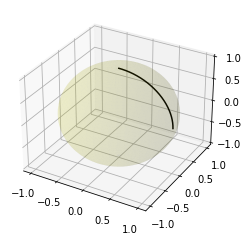

In [151]:
from scipy.spatial import geometric_slerp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='y', alpha=0.1)

start = np.array([1, 0, 0])
end = np.array([0, 0, 1])
t_vals = np.linspace(0, 1, 200)
result = geometric_slerp(start,
                         end,
                         t_vals)
ax.plot(result[...,0],
        result[...,1],
        result[...,2],
        c='k')
#ax.set_aspect('equal')
plt.show()